<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Techniques

## Objectives: 

- Recognize when **p > n**, and why this leads to failure of certain ML models
- Recognize **high dimensionality data**, and can **employ PCA** to improve model performance
- Understand the limitations that come with **projecting data onto an eigenvector subspace**


## Functions

- A function is a mapping from a set of inputs to a set of outputs where no input is mapped to multiple outputs.

e.g. $f(x) = 2x + 3$


### The Vertical Line Test
You've probably heard of the "Vertical Line Test" in high school math classes where (for functions that are represented in $\mathbb{R}^2$) if you were to pass a vertical line over the plotted function it would only be touching the function in one spot at any given time:

- **Which of the graphs below are functions?**

![Vertical Line Test](https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3A85b0a1b61e819b34d9de44bdc1bf16987fcf6799a764bfc5e0328bfc%2BIMAGE_THUMB_POSTCARD_TINY%2BIMAGE_THUMB_POSTCARD_TINY.1)

### Relations as functions

A very simple form of function is a relation (pairs of input-output mappings held in a set)
- `{(input value, output value), (input value, output value)}`

Imagine that we were trying to plot the line that created by the function $f(x) = 2x + 3$

How could we do it? We could probably pick some simple $x$ values that exist near the origin and plug them in to see what their corresponding $y$ values were. We could make some kind of a table or list of points that are on the line and then "connect the dots" to plot it:


\begin{align}
\text{Points: } (-2, y), (-1, y), (0, y), (1, y), (2, y)
\end{align}

Although this relation isn't represented by a specific equation (because it's just 5 points). However it meets our definition of a function, so this set of ordered pairs which show a valid mapping of domain values to range values is a function. If we plot these 5 points it would be a bit sparse but it would pass the vertical line test.

Relations that satisfy these conditions are functions. (albeit very simple ones)


**Which of the following relations are functions?**

\begin{align}
\text{Relation 1: } \{(-2, -1), (-2, 1), (2, 3)\}
\\
\text{Relation 2: } \{(-2, 5), (-1, 5), (0, 5)\}
\\
\text{Relation 3: } \{(0, -1), (-1, 1), (0, 3)\}
\end{align}

## Linear Transformations

"Transformation" = some function that we pass our vectors through and some changed vectors comes out the other side.
"Linear" = a focus on manipulating vectors so that lines remain lines + the origin is fixed in place.

Lets look at the function $f(x) = 2x + 3$ again.

This is how lower level math classes deal with functions, they put one number in as input and they get one output, but there's no reason why we need to limit functions to having just one input.

What if I defined a function like this $g(x_1, x_2) = x_1+x_2$

**_Side Note:_** I hope that if you weren't already comfortable with it that this kind of function notation, that it makes a lot more sense since you've been writing python functions and you recognize the things in the parenthesis as being the parameters of a function just like how we would write it in code.

The above function $g$ requires a two-dimensional tuple of inputs (two inputs) and gives a single output. We would say that this function is a mapping from $\mathbb{R}^2$ to $\mathbb{R}$.

Here's another function: $h(x_1, x_2, x_3) = (x_1 + 2, x_2 - x_3 )$

What is the dimensionality of the domain compared to the range (codomain)? Can you see that this mapping takes sets of values points from a certain dimensionality and maps them to sets of values with a smaller dimensionality?





### Tranforming Vectors

For today, we're going to go easy on you and imagine a mapping of vectors from $\mathbb{R}^2$ to $\mathbb{R}^2$.  We're just going to work with transforming 2D vectors to some other vector in two dimensions. 

In linear algebra for a linear transformation to be valid it must meet the following two requirements:

\begin{align}
T(u+v) = T(u)+T(v)
\\
T(cu) = cT(u)
\end{align}

What these two properties mean is that scaling vectors is still valid and that a transformation of two vectors can be seen as the composition of smaller transformations (like scaled unit vectors added together).

### Linear Transformations As Matrix-Vector Products
What if I defined a mapping from $\mathbb{R}^2$ to $\mathbb{R}^2$ like so:

\begin{align}
f(\begin{bmatrix}x_1 \\ x_2\end{bmatrix}) = \begin{bmatrix} 2x_1 + x_2 \\ -3x_2 + x_1 \\  \end{bmatrix}
\end{align}

Well, remember how we can write any vector as a linear combination of scalars and basis vectors? How would I rewrite my input vector in those terms?

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

You might remember from the 3Blue1Brown video about linear transformations that they can be described as the composition of transformations of our basis vectors. rewriting our input vector in this way will help us see that.

What if we evaluated our expression by passing in the unit vectors $\hat{i}$ and $\hat{j}$?

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 1 \\ -3 \end{bmatrix}
\end{align}

By passing in our unit vectors individually, We are essentially asking: Tell me what happens to all of the x values, and then tell me what happens to all of the y values individually. And the resulting vector will be a composition of how both the y values and x values change. 

The coolest part about passing in the unit vectors is that we've got two new vectors back that we can compose into a transformation matrix:

\begin{align}
T = \begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}
\end{align}

We can now describe the same function above as the product of matrix-vector multiplication between our resulting transformation vector and any vector in $\mathbb{R^2}$.

Lets test it! First lets use the original function to calculate the result of passing in 

\begin{align}
f(\begin{bmatrix} 3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 10 \\ -9 \end{bmatrix}
\end{align}

Now lets do it via matrix multiplication:

\begin{align}
\begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 10 \\ -9 \end{bmatrix}
\end{align}

Wild right???

Because of the properties of linear transformations, we can describe any linear transformation as matrix vector multiplication where the columns of the transformation matrix come from the result of passing in the dimension appropriate unit vectors into the function. So cool that we could represent a much more traditional function (mapping) as matrix-vector multiplication because of the way that we can represent vectors as linear combinations of scalars and unit vectors. 

## Eigenvectors & Eigenvalues

All vector-matrix multiplication can be thought of as a multi-dimensional transformation of space. (I hope that by now you're realizing how critical linear algebra is for representing multi-dimensional data.) This is hard for me to demonstrate without some cool animations so I'll have to rely upon 3Blue1Brown videos to help get you that intuition. Those videos are really the only place where I've seen that principle demonstrated even a little bit effectively.

One thing that might not be immediately clear however, is that not all points in space get transformed in exactly the same way. Think about a transformation in $\mathbb{R^3}$ where we rotate 3D space. You could imagine a globe spinning on its axis.

- Symbol for eigenvalues = $\lambda$
- Eigenvector = $\lambda v$

![Globe Spinning GIF](https://thumbs.gfycat.com/FoolishLavishDeer-small.gif)

When a globe rotates, does every point on the globe move the same distance in space? No, points closer to the pole move less than points near the equator (kinda weird if you think about it that people living near the equator are hurtling through space at a different rate than other latitudes). 

What about the vector represented by the earth's axis? Does it move? 

We could call this vector the **eigenvector** of the earth's rotation because the transformation does not reorient it. Any transformation that you could conceive of possesses eigenvectors (dimensions of space that are not pointed in a new direction by the transformation described by a certain transformation matrix).

### So what's an eigenvalue?

An eigenvector is any vector that doesn't change its orientation during a given transformation, but an eigenvector might still get scaled by some scalar. It can get stretched or squished, it just can't change the direction in which it is pointing. An **eigenvalue** is the scalar that represents how its corresponding eigenvector was scaled during the transformation. Eigenvectors and eigenvalues always come in pairs.

What is the eigenvalue of the earth's axis when the earth rotates?

### Finding Eigenvalues and Eigenvectors

We don't have time to go over this today and it's one of the more complex processes in Linear Algebra. It usually involves a combination of a process called "Matrix Diagonalization" and Gaussian Elimination. If you're interested, you can look it up but that process is too complex for the time that we have today and I think you will be better served by focusing on an application of all of these concepts: **Principle Component Analysis (PCA)**

## The Curse of Dimensionality

The Curse of Dimensionality is a term that is used to refer to some of the challenges and limitations that arise from trying to process or model datasets with a large number of features. (hundreds or thousands)

### Visualising dimensions

**What is a Dimension?**

Imagine that we have a dataset with 50 numeric datapoints. How would we graph a single column of data? Well, we have nothing else in the dataset to compare it to, so all that we can do is really plot the values on a one-dimensional number line.

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Create a list of 50 random floats and add them to a dataframe
N = 50
x = np.random.rand(N)*100

# Crete Dataframe
data = {"x": x}
df = pd.DataFrame(data)
df.head()

x
0  30.705421
1  12.901249
2   8.060926
3  89.327330
4   3.261435

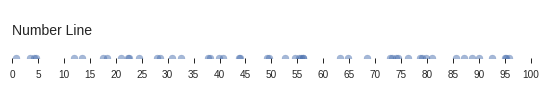

In [ ]:
# Plot the floats on a number line

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
    
plt.figure(figsize=(8, 6))
n = 8

# Create some y values to satisfy matplotlib
df['y'] = pd.Series(list(np.zeros(50)))

# Multiple Locator tick mark settings
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.text(0.0, 0.5, "Number Line", fontsize=14,
        transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.scatter(df.x, df.y, alpha=0.5)

plt.show()

**What a pain...**

**Two Dimensions**

What if I wanted to plot plot these points on a two-dimensional graph like a scatter plot? Well, I would need y values to tell the points where to go, or else they would just sit on the x-axis of the 2D graph. If we don't have any y values, the additional axis of the coordinate plane serves no purpose.

The number line is a 1D graph with 1D data. Scatter plots are 2Ds graphs that facilitate 2D data.

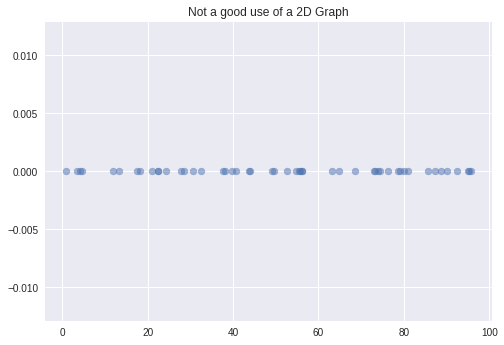

In [ ]:
plt.scatter(df.x, df.y, alpha=0.5)
plt.title("Not a good use of a 2D Graph")
plt.show()

In [ ]:
# Generate 50 random y values and add them to the dataframe
df['y'] = pd.Series(list(np.random.rand(N)*100))
df.head()

x          y
0  87.224509   0.828650
1  22.433375  59.655565
2  54.646833  69.856257
3  49.150725  30.249769
4  72.895643   7.607457

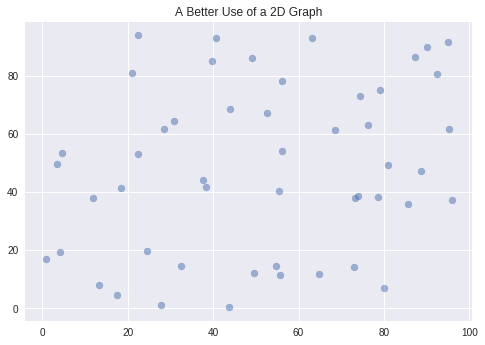

In [ ]:
# Graph 2D data on a 2D plot
plt.scatter(df['x'], df['y'], alpha=0.5)
plt.title("A Better Use of a 2D Graph")
plt.show()

**3-Dimensional Data on a 3-Dimensional Graph!**

I hope you've realized that the number of dimensions that we want to plot, the number of columns that is required in the dataframe. This is why you'll hear people refer to Dataframe columns: Columns, Features, and Dimensions, interchangeably.

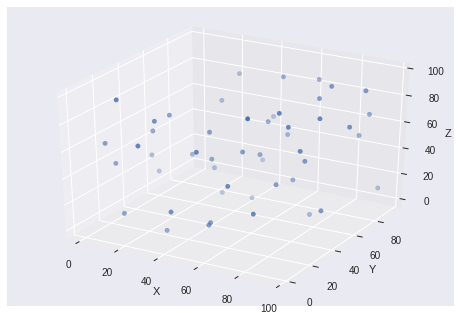

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Add Z dimension to dataframe
df['z'] = pd.Series(list(np.random.rand(N)*100))

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

**3D Graphs on 2D screens are a lie... unless they can rotate.**

Unless this graph can rotate like a hologram it's a 2D graph that's trying really hard, yet failing to be a 3D graph. Look more closely at the pionts and you'll realize that you actually have no idea where they are at. You have no depth perception unless you can rotate the graph. This is something that's possible to do in iPython notebooks, but that I didn't want to mess with right now. You can explore it on your own. Some libraries will try and change the diameter of the points so that ones "closer" to the viewer have some kind of depth, but this is an imperfect solution.

**What if we tried a spatially represent 4-Dimensional Data in a 4D graph?**

![Mind Blown](https://ih1.redbubble.net/image.400523286.2984/ap,550x550,16x12,1,transparent,t.u3.png)

While it **is** technically possible to plot points on a 4-Dimensional graph, the result is by no means intuitive and suffers from even worse interpretation problems than the 3D graph.

![Hyper Cube](http://www.zamandayolculuk.com/09/4d_quadiper.gif)

A cube is 3-dimensional, so any representation larger than 3 dimensions is referred to as an n-dimensional hypercube in n-dimensional hyperspace. This is why in space movies/books they always zoom to "hyperspace" when they're trying to take a shortcut through the 3 spatial dimensions of our reality.

**Now Lets do a 1000 dimensional dataset!**

You see the problem? 

While the inability for the human brain to spatially comprehend more than 3 dimensions is not **really** the curse of dimensionality, this limitation of our human brain is related to some of the challenges of dealing with high-dimensional data.

**A thought experiment**

A great explanation from a Quora user: (Sorry, I can't find the actual Quora post that this originated from) I've modified it a little bit as well.

```
Let's say you have a straight line 100 yards long and you dropped 10 pennies somewhere on it. It wouldn't be too hard to find one. You walk along the line and it takes a few seconds, maybe as long as a couple of minutes if you're unlucky.

Now let's say you have a square 100 yards on each side and you dropped 10 pennies somewhere on it. It would be harder. The pennies are more spread out now. This is like searching across two football fields stuck together. It could take hours or days to find one. (on average, 10 times longer than the first time)

Now imagine a cube 100 yards across. That's like searching a 30-story building the size of a football stadium. Ugh. (It's now 100 times harder to find a penny in this space than in the first example)

The difficulty of searching through the space gets exponentially harder as you have more dimensions.
```


### Challenges of High Dimensional Spaces

**Diminishing returns to adding features (increased redundancy)**

Not every feature is as important as every other feature when it comes to capturing relationships in data. he likelihood of adding a feature that contributes meaningful signal to a particular predictive endeavor decreases with each additional dimension.

A good example of this is Deep Learning image recognition tasks:

![different resolution images](https://ccideas.com/wp-content/uploads/2012/02/hi-low-res.jpg)

How does increasing the number of pixels (dimensions of an image) increase our ability to detect what the image is? 

If an extra dimension is more expensive to process but adds less value to a model, then at some point it isn't cost effective to add additional dimensions.

**Increased computational workload**

Just like how it takes more time to find the pennies in the 100x100x100 yard cube.

**Increased sparcity of data - Measures of distance (Euclidean) lose meaning **

As we add dimensions, our datapoints become more spread out. Just look at the difference between the 1-dimensional numberline and the 2-dimensional scatterplot that we did above. With each dimension that we add our datapoints spread out further, but at a decreasing rate. Eventually, in extremely high dimensional settings all datapoints appear to be more or less equidistant to one another. This is crippling to algorithms that rely upon measures of distance (Like Clustering for example). We'll talk more about this on Thursday! 

Low number of observations relative to dimensions increases the risk of overfitting

![Overfitting vs Underfitting](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

The the degree to which increased dimensions can lead to overfitting varies from model to model. The above images are examples of a linear regression model that is attempting to fit a good line through the data. We'll talk about this extensively next week, but linear regression models can be curved, You've typically seen a straight line cutting through a cloud of points, but just no that fitting a curve to a cloud of points doesn't violate the linearity of the model equation. Don't worry about this too much right now.

With a linear regression you can create a bend in the line of best fit by introducing another parameter. This parameter has to come from your dataset as another feature (or dimension). If my cloud of points is made up of only 9 data points, then I can curve my line of best fit exactly through each point by including 9 parameters. When discussing this aspect of the Curse of Dimensionality we will abbreviate the number of parameters that we are including in the model (dimensions, features) as **P** and the number of observations (rows in a dataset) as **N**. 

If **P** $\geq$ **N** then I am at extreme risk of overfitting my model. Overfitting means that my model has fit to the noise or variance or the data rather than the acutal signal or phenomenon that we are trying to model. This damages the predictive accuracy of a model and makes it so that our model will not be able to generalize (perform well) to new data that it hasn't seen before.



### Rules of Thumb

While these rules of thumb can vary from model to model, some say that you should always make sure that you have 5 times the number of observations as you have parameters in your model. This is an easier task for some models than others. Some practitioners hold a more extreme view and say that the number of observations should be the square of the number of parameters. I think this is silly once you get to truly high numbers of dimensions, but some people are adamant about it (past professors of mine who really didn't deal with really high numbers of dimensions in their work and were blind to the existence of any other statistical approaches).


**Remember This:**

- You're in grave danger of overfitting if P $\geq$ N
- Make sure you have N = 5P (as a minimum)
- Having more observations is almost always better
- More data in terms of additional dimensions has diminishing value

**Solutions**

- Discard redundant data
- Get More Data - LOTS more data
- Don't measure similarity via Euclidean Distance
- Get More Data - more observations not more features

> More data covereth a multitude of sins.


## Dimensionality Reduction Techniques

The Curse of Dimensionality means that as "Big Data" gets bigger and bigger the challenges associated with it become more difficult. Not only is it difficult to explore and visualize high dimensional data, but also certain intuitions that exist in 2d or 3d space begin to betray us (distance between points for example). Also models that have a high feature to observation ratio are more prone to overfitting.

What if we could take Big Data and make it smaller while still retaining most of its substance? In Machine Learning there are a whole host of Dimensionality Reduction Techniques that enable us to do exactly that. (with some tradeoffs - like always.)

### Feature Selection

Say we have 100 features in our dataset. Instead with fighting with all of them, what if we just used the ones that contributed the most. Feature Selection refers to methods of filtering irrelevant or redundant features from our dataset.

### Feature Extraction


Feature Extraction creates a new, smaller set of features that stills captures most of the useful information. Feature selection finds a suitable subset of a dataset's features, feature extraction creates new ones altogether. PCA is a Feature Extraction method.

## Principle Component Analysis (PCA)

PCA is a technique for feature extraction. — It combines our input variables in a specific way, so that we can drop the “least important” variables while still retaining the most valuable parts of all of the variables.

Remember that each feature of our dataset is a dimension. PCA is a method of transforming higher-dimensional data to lower dimensions whilst preserving as much information as possible (reducing the complexity of the data).

This is done through linear projection (which is a type of linear transformation that we learned about yesterday)!

Here's a handy video to visualize the process step-by-step:

[[Video] - Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ)

### Visualizing PCA

Imagine you were making shadow puppets by putting your hand in front of some light source that was projecting onto a wall.

If you want the shadow that was being cast onto the wall to be very recognizable as a hand which way would you orient your hand? (kill screenshare)

Why is that orientation more recognizeable as a hand than other orientations?

**variance == information!**

Handy visualisation:
<http://setosa.io/ev/principal-component-analysis/>

### The PCA Process

The PCA flow is to: clean data (step 1) => standardize data (steps 2 & 3) => PCA (steps 4 - 7)

**1) Separate your data into X and Y, variables.**

Remember that the y variable is the "label" or the "target" it's the thing that we want to predict. our X variables are all of the features of our data that are going it help us to predict Y.



**2) Center each column at 0 by subtracting its mean.**

Take the matrix of independent variables $X$ and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)

If we don't do this then it will appear as if one component explains most of the variance in the data and the other components explain very little.  

**3) Divide each column by its standard deviation.**

This completes the process of "standardizing" our data - giving it a mean of 0 and a standard deviation of 1. Just like we standardized our variance and covariance, this now makes the variances of our different features comparable and removes some of the concerns that were brought up when we talked about the rotated ellipse of points.
 
We'll call the new standardized matrix the $Z$ matrix.

**4) Calculate the Variance-Covariance matrix of Z.**

Do this by calculating $Z^{T}Z$ Mind blown! - Multiplying a matrix by its transpose yields the variance-covariance matrix. 

**5) Calculate the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix.**

What are the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix? The eigenvectors are those that run along the dimensions that maximize the variance along that dimension. Remember our rotated ellipse example? When we moved our ellipse off of the x and y-axis we then didn't know what line we should project the points onto so that we could collapse the dimension of least variance. Well, now we do!

**6) Sort the Eigenvalue and Eigenvector Pairs.**

We'll sort our eigenvalue eigenvector pairs that resulted from the eigendecomposition of the variance-covariance matrix. We'll sort them by their eigenvalues in descending order. Since the eigenvalues tell us how to scale an eigenvector. The largest eigenvalue corresponds to the direction of greatest variance in the data. The eigenvalue eigenvector pair with the largest eigenvalue will be Principal Component 1

**7) Use a matrix transformation to project the datapoints onto our eigenvector subspaces.**

This final step is what makes it so that if we plot our transformed data our principal components will be aligned with the axis of our graph.

### Using PCA

In [ ]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

# defining our X values (this will be separating our X and Y values)
X = array([[1,2], [3,4], [5,6]])
print("Data: ", X)

# calculate the mean values of each column
means = mean(X.T, axis=1)
print("\n means: \n", means)

# centering the data around a new origin by subtracting column means
centered_data = X - means
print("\n Centered data: \n", centered_data)

# get the s.d. for each column
std_devs = std(X.T, axis=1)
print("\n Standard deviations: \n", std_devs)

# standardize our data by dividing by std_dev
standardized_data = centered_data / std_devs
print("\n Standardized data: \n", standardized_data)

# calculate our covariance matrix from our data
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)

# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
# access eigenvalues and eigenvectors
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data to new "subspace"
# subspace = a subset of some larger vector space.
# we are projecting from R^2 => R in this case
P = vectors.T.dot(standardized_data.T)
print("\n Projected data: \n", P.T)

Data:  [[1 2]
 [3 4]
 [5 6]]

 means: 
 [3. 4.]

 Centered data: 
 [[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

 Standard deviations: 
 [1.63299316 1.63299316]

 Standardized data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Covariance Matrix: 
 [[1.5 1.5]
 [1.5 1.5]]

 Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Eigenvalues: 
 [3. 0.]

 Projected data: 
 [[-1.73205081e+00 -7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00  7.75139526e-18]]


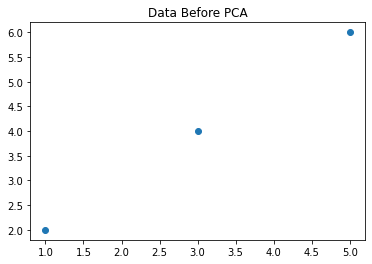

In [ ]:
# Plot the data before PCA

x = [1,3,5] 
y = [2,4,6]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data Before PCA")
plt.show()

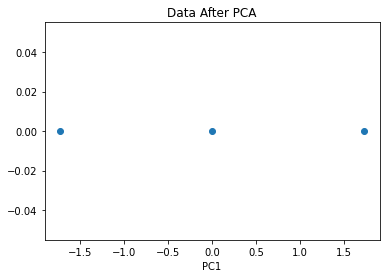

In [ ]:
# Plot the data after PCA

x = [-1.73205081,0,1.73205081] 
y = [0,0,0]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

### Lets use a library to check our work!

In [ ]:
# Principal Component Analysis
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# defining our X values (this will be separating our X and Y values)
X = array([[1,2], [3,4], [5,6]])
print("Data: ", X)
# Standardize the Data
# Instantiate a Standard Scaler object
scaler = StandardScaler()
# Transform our data to our standardized data
Z = scaler.fit_transform(X)
print("\n Standardized data: \n", Z)
# 2 = the number of columns to keep in the new PCA dataset (the principle components to keep)
# In this instance we are keeping PC1 & PC2
# can also feed in a % value of how many variance is retained 
pca = PCA(2)
# .fit() = a method, which learns model parameters (e.g. mean and standard deviation for normalization) 
# from a training set, and a transform method which applies this transformation model to unseen data.
pca.fit(Z)
# access eigenvalues and eigenvectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)
# project data to new "subspace"
# subspace = a subset of some larger vector space.
# we are projecting from R^2 => R in this case
B = pca.transform(Z)
print("\n Projected data: \n", B)


Data:  [[1 2]
 [3 4]
 [5 6]]

 Standardized data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 Eigenvalues: 
 [3.00000000e+00 1.23259516e-32]

 Projected data: 
 [[-1.73205081e+00  7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00 -7.75139526e-18]]
